## Modeling the evolution of ploidy in a resource restricted environment
Jupyter notebook to re-run the simulations and subsequent analyses published as part of the ISMCO 2019 (ismco.net).

In [3]:
## Load required libraries and dependencies
options(java.parameters = "-Xmx5g")
library(abc)
library(ggplot2)
library(matlab)
devtools::source_url("https://github.com/noemiandor/Utils/blob/master/cap.R?raw=TRUE")
download.file("https://github.com/cloneredesignlab/HAL/blob/master/out/artifacts/HAL_jar/showSimulation.jar?raw=true","~/Downloads/showSimulation.jar")
bucket = aws.s3::get_bucket("groworgo")

Loading required package: abc.data
Loading required package: nnet
Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Loading required package: MASS
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22

Attaching package: ‘matlab’

The following object is masked from ‘package:stats’:

    reshape

The following objects are masked from ‘package:utils’:

    find, fix

The following object is masked from ‘package:base’:

    sum

SHA-1 hash of file is 73efd33f58f904621fb85cfba46ce7b130281b02


In [ ]:
# ##To re-run simulations, do:
# download.file("https://github.com/cloneredesignlab/HAL/blob/master/out/artifacts/HAL_jar/runSimulations.jar?raw=true","~/Downloads/showSimulation.jar")
# system2("java",c("-jar","runSimulations.jar", "count:10", "eMin:100", "eMax:2200", "by:200", "outDir:~/Downloads/
# "))

In [9]:
## Load simulated data from AWS
out = as.data.frame(matrix(NA,210,3))
colnames(out)=c("Energy","Pearson","GrowPriority")
rownames(out)=paste0("sim", 1:nrow(out), ".out")
for (i in rownames(out)) {
    x = paste0("s3://groworgo/",i)
    dm = aws.s3::s3read_using(read.table, check.names = F, stringsAsFactors = F, 
        header = T, fill=T, object = x)
    param = aws.s3::s3read_using(read.table, check.names = F, stringsAsFactors = F, 
                             header = T, row.names=1, object = gsub(".out",".param", x)); 
   
    out[i,1:2] = c(as.numeric(param["energy",]),cor.test(dm$Ploidy, dm$Dist2Center)$estimate)
    out[i,"GrowPriority"] = param["priority_grow",]
    #hist(dm$Ploidy, main = fileparts(x)$name)
}

out[,"GrowPriority"] = as.factor(out[,"GrowPriority"])

Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”

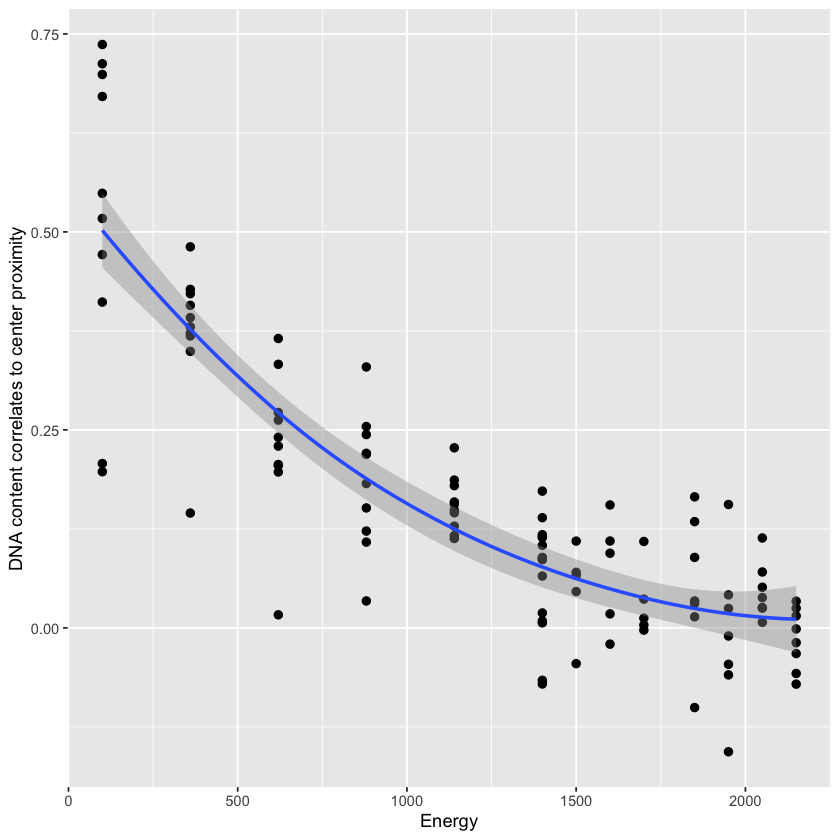

In [10]:
## Visualize simulations for which cell division has priority over cell migration
out_=out[out[,"GrowPriority"]=="true",]
ggplot(out_, aes(x=Energy, y=Pearson)) + #, color=GrowPriority
  geom_point(size=2) +
  geom_smooth(method="loess",se=TRUE, span = 1.5) +
  ylab("DNA content correlates to center proximity") +
  ggsave("~/Downloads/EnergyDependentMigrationPloidyCorr.eps", width = 3.3, height = 3.3)

In [14]:
head(out,12)

,Energy,Pearson,GrowPriority
,<dbl>,<dbl>,<fct>
sim1.out,100,0.73661602,true
sim2.out,230,0.36383102,false
sim3.out,360,0.42746839,true
sim4.out,490,0.16395221,false
sim5.out,620,0.33283085,true
sim6.out,750,0.18076097,false
sim7.out,880,0.12225532,true
sim8.out,1010,0.17056866,false
sim9.out,1140,0.17958379,true


Next, we take a closer look at two of the simulations -- one with low, the other with high energy available in the environment.

In [4]:
##Re-run simulations locally
numTicks=100
soi=list("sim1.param", "sim12.param")
setwd("~/Downloads")
o=sapply(soi, function(x) aws.s3::save_object(x, bucket, file = x));
o=sapply(soi, function(x) system2("java",c("-jar","showSimulation.jar",x,numTicks), stdout = T))

In [5]:
##Display them side by side
x=magick::image_read(o[1])
y=magick::image_read(o[2])

xy=lapply(1:length(x), function(i) magick::image_append(c(x[i], y[i])))

magick::image_animate(do.call(c,xy), loop = 3);

<img src="data:image/gif;base64,R0lGODlh3AXuAvAAAAAAAP/VACH5BAQKAAAAIf8LTkVUU0NBUEUyLjADAQIAACwAAAAA3AXu
AgAC/oSPqcvtD6OctNqLs968+w+G4kiW5omm6sq27gvH8kzX9o3n+s73/g8MCofEovGITCqX
zKbzCY1Kp9Sq9YrNarfcrvcLDovH5LL5jE6r1+y2+w2Py+f0uv2Oz+v3/L7/DxgoOEhYaHiI
mKi4yNjo+AgZKTlJWWl5iZmpucnZ6fkJGio6SlpqeoqaqrrK2ur6ChsrO0tba3uLm6u7y9vr
+wscLDxMXGx8jJysvMzc7PwMHS09TV1tfY2drb3N3e39DR4uPk5ebn6Onq6+zt7u/g4fLz9P
X29/j5+vv8/f7/8PMKDAgQQLGjyIMKHChQwbOnwIMaLEiRQrWryIMaPG/o0cO3r8CDKkyJEk
S5o8iTKlypUsW7p8CTOmzJk0a9q8iTOnzp08e/r8CTSo0KFEixo9ijSp0qVMmzp9CjWq1KlU
q1q9ijWr1q1cu3r9Cjas2LFky5o9izat2rVs27p9Czeu3Ll069q9izev3r18+/r9Cziw4MGE
Cxs+jDix4sWMGzt+DDmy5MmUK1u+jDmz5s2cO3v+DDq06NGkS5s+jTq16tWsW7t+DTu27Nm0
a9u+jTu37t28e/v+DTy48OHEixs/jjy58uXMmzt/Dj269OnUq1u/jj279u3cu3v/Dj68+PHk
y5s/jz69+vXs27t/Dz++/Pn069u/jz+//v38/vv7/w9ggAIOSGCBBh6IYIIKLshggw4+CGGE
Ek5IYYUWXohhhhpuyGGHHn4IYogijkhiiSaeiGKKKq7IYosuvghjjDLOSGONNt6IY4467shj
jz7+CGSQQg5JZJFGHolkkkouyWSTTj4JZZRSTklllVZeiWWWWm7JZZdefglmmGKOSWaZZp6J
Zppqrslmm26+CWeccs5JZ5123olnnnruyWeffv4JaKCCDkpooYYeimiiii7KaKOOPgpppJJO
Smmlll6Kaaaabsppp55+Cmqooo5Kaqmmnopqqqquymqrrr4Ka6yyzkprrbbeimuuuu7Ka6++
/gpssMIOS2yxxh6L/myyyi7LbLPOPgtttNJOS2211l6Lbbbabsttt95+C2644o5Lbrnmnotu
uuquy2677r4Lb7zyzktvvfbei2+++u7Lb7/+/gtwwAIPTHDBBh+McMIKL8xwww4/DHHEEk9M
ccUWX4xxxhpvzHHHHn8Mcsgij0xyySafjHLKKq/McssuvwxzzDLPTHPNNt+Mc84678xzzz7/
DHTQQg9NdNFGH4100kovzXTTTj8NddRST0111VZfjXXWWm/Ndddefw122GKPTXbZZp+Ndtpq
r812226/DXfccs9Nd91234133nrvzXfffv8NeOCCD0544YYfjnjiii/OeOOOPw555JJP/k55
5ZZfjnnmmm/Oeeeefw566KKPTnrppp+Oeuqqr856666/Dnvsss9Oe+2234577rrvznvvvv8O
fPDCD0988cYfj3zyyi/PfPPOPw999NJPT3311l+Pffbab899995/D3744o9Pfvnmn49++uqv
z3777r8Pf/zyz09//fbfj3/++u/Pf//+/w/AAApwgAT0UQAOiMAEKrBdCxSXAh+YQAZG0IEQ
hKAEETiuClqQXQ0MlwYfeMEDZnCCB/igtzpogA+isForNGG3WqhCDGILhhU8IQlTGEMRzvCG
AHAht2gYw2wBEYQv5GEOddisITpghco6ohOJKC0lNoCJyXqi/hWRGC0pMoCKyLqiFamlxQVw
8VhefCIYjcjDBIzRWGV0YhPbCMcAFCuOX0SAD3FFxzbOMY9HVKMGd8VHL+4xkCr0Yw11Rcg6
DiuRhbTjHxHJyD4SK5KPLGElezVEN04xjb+ipAyTiMYrLpGTvvIkFpeVSUlukZSYNOWzUpnD
UX5SWKaUo7NgGcRNzjJYtXxlKAPpS0++cZeMDCYlh3nKYt7SlVX8JR+NGUlk2tKShISmMkEp
zGUekprJZCUqmYnNDXJzmjjcpTUTeU5iOvOM2QwnFMvZTXNq85jzfGcP17nDOArRmXdkIR33
qc5Y5hOOAI1nLq+Vx4KS854CReg//ge6UE06tKHg6uca2XnQil6SoadUaD9tuE14LtSjGwWp
OEVq0kZ6cKMXLaBLXwrTmMp0pjStqU1vitOc6nSnPO2pT38K1KAKdahELapRj4rUpCp1qUxt
qlOfCtWoSnWqVK2qVa+K1axqdatc7apXvwrWsIp1rGQtq1nPita0qnWtbG2rW98K17jKda50
ratd74rXvOp1r3ztq1//CtjACnawhC2sYQ+L2MQqdrGMbaxjHwvZyEp2spStrGUvi9nManaz
nO2sZz8L2tCKdrSkLa1pT4va1Kp2taxtrWtfC9vYyna2tK2tbW+L29zqdre87a1vfwvc4Ap3
uMQtrnGP/ovc5Cp3ucxtrnOfC93oSne61K2uda+L3exqd7vc7a53vwve8Ip3vOQtr3nPi970
qne97G2ve98L3/jKd770ra9974vf/Op3v/ztr3//C+AAC3jABC6wgQ+M4AQreMEMbrCDHwzh
CEt4whSusIUvjOEMa3jDHO6whz8M4hCLeMQkLrGJT4ziFKt4xSxusYtfDOMYy3jGNK6xjW+M
4xzreMc87rGPfwzkIAt5yEQuspGPjOQkK3nJTG6yk58M5ShLecpUrrKVr4zlLGt5y1zuspe/
DOYwi3nMZC6zmc+M5jSrec1sbrOb3wznOMt5znSus53vjOc863nPfO6zn/8MfuhAC3rQhC60
oQ+N6EQretGMbrSjHw3pSEt60pSutKUvjelMa3rTnO60pz8N6lCLetSkLrWpT43qVKt61axu
tatfDetYy3rWtK61rW+N61zrete87rWvfw3sYAt72MQutrGPjexkK3vZzG62s58N7WhLe9rU
rra1r43tbF+5AAAh+QQECgAAACwAAAAA3AXuAoEAAAD/rgD/1QD//AAC/oSPqcvtD6OctNqL
s968+w+G4kiW5omm6sq27gvH8kzX9o3n+s73/g8MCofEovGITCqXzKbzCY1Kp9Sq9YrNarfc
rvcLDovH5LL5jE6r1+y2+w2Py+f0uv2Oz+v3/L7/DxgoOEhYaHiImKi4yNjo+AgZKTlJWWl5
iZmpucnZ6fkJGio6SlpqeoqaqrrK2ur6ChsrO0tba3uLm6u7y9vr+wscLDxMXGx8jJysvMzc
7PwMHS09TV1tfY2drb3N3e39DR4uPk5ebn6Onq6+zt7u/g4fLz9PX29/j5+vv8/f7/8PMKDA
gQQLGjyIMKHChQwbOnwIMaLEiRQrWryIMaPG/o0cO3r8CDKkyJEkS5o8iTKlypUsW7p8CTOm
zJk0a9q8iTOnzp08e/r8CTSo0KFEixo9ijSp0qVMmzp9CjWq1KlUq1q9ijWr1q1cu3r9Cjas
2LFky5o9izat2rVs27p9Czeu3Ll069q9izev3r18+/r9Cziw4MGECxs+jDix4sWMGzt+DDmy
5MmUK1u+jDmz5s2cO3v+DDq06NGkS5s+jTq16tWsW7t+DTu27Nm0a9u+jTu37t28e/v+DTy4
8OHEixs/jjy58uXMmzt/Dj269OnUq1u/jj279u3cu3v/Dj68+PHky5s/jz69+vXs27t/Dz++
/Pn069u/jz+//v38/vv7/w9ggAIOSGCBBh6IYIIKLshggw4+CGGEEk5IYYUWXohhhhpuyGGH
Hn4IYogijkhiiSaeiGKKKq7IYosuvghjjDLOSGONNt6IY4467shjjz7+CGSQQg5JZJFGHolk
kkouyWSTTj4JZZRSTklllVZeiWWWWm7JZZdefglmmGKOSWaZZp6JZppqrslmm26+CWeccs5J
Z5123olnnnruyWeffv4JaKCCDk

# A tibble: 50 x 7
   format width height colorspace matte filesize density
   <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
 1 gif     1500    750 sRGB       FALSE        0 72x72  
 2 gif     1500    750 sRGB       TRUE         0 72x72  
 3 gif     1500    750 sRGB       TRUE         0 72x72  
 4 gif     1500    750 sRGB       TRUE         0 72x72  
 5 gif     1500    750 sRGB       TRUE         0 72x72  
 6 gif     1500    750 sRGB       TRUE         0 72x72  
 7 gif     1500    750 sRGB       TRUE         0 72x72  
 8 gif     1500    750 sRGB       TRUE         0 72x72  
 9 gif     1500    750 sRGB       TRUE         0 72x72  
10 gif     1500    750 sRGB       TRUE         0 72x72  
# … with 40 more rows